# Perceptron

In [48]:
from random import random, randint
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

### Funções predizerDado e calcularAcuracia

In [2]:
def predizerDado(dado, vetorPesos):
    
    # Tenho que ir somando cada dimensão do dado de entrada com o respectivo peso
    soma = 0.0
    
    # Passando por cada dimensão e somando as multiplicações
    for valorDadoDimensao, pesoDimensao in zip(dado, vetorPesos):
        soma += valorDadoDimensao * pesoDimensao
    
    # Retorna classe 1 se a soma der >= 0 e classe 0 caso contrário
    if soma >= 0:
        return 1
    else:
        return 0

In [3]:
# Se em algumas iterações do perceptron a acurácia chegar a 100%, então posso parar o algoritmo
def calcularAcuracia(x, y, vetorPesos):
    
    qtdAcertos = 0
    
    # Passando por cada dado para predizer sua classe e comparar com a real
    for dadoAtual, classeReal in zip(x, y):
        
        # Fazendo a predição
        classePredita = predizerDado(dadoAtual, vetorPesos)
        
        # Se acertei, então somo 1 em qtdAcertos
        if classePredita == classeReal:
            qtdAcertos += 1
            
    # Retorno a porcentagem de acertos
    return qtdAcertos / float(len(x))

#### Testando as funções

In [4]:
# Criando os dados, as classificaçao verdadeira e os pesos de cada dimensão
x = [
        [1.0, 2.4, 3.8, 4.4],
        [0.8, -2.8, 0, -0.4],
        [1.8, 0.8, 3.4, 4.1],
        [-1.8, 0, -3.1, 0],
        [1.4, -2.1, 0, 0.4]
    ]

y = [1, 0, 1, 0, 0]

vetorPesos = [0, 0.3, 0.1, 1]

In [5]:
# Verificando quais serão as predições para cada dado
predicoes = []

for dado in x:
    predicoes.append(predizerDado(dado, vetorPesos))
    
print(predicoes)

[1, 0, 1, 0, 0]


In [6]:
# Printando a acurácia
print(calcularAcuracia(x, y, vetorPesos))

1.0


### Função treinarPesos

In [7]:
def treinarPesos(x, y, vetorPesos, qtdMaxIteracoes = 10000, taxaAprendizagem = 0.5):
    
    # Irei alterar o valor dos pesos no máximo qtdMaxIteracoes vezes
    for i in range(qtdMaxIteracoes):
        
        # Primeiro calculo a acurácia atual para ver se já posso parar o algoritmo
        acuraciaAtual = calcularAcuracia(x, y, vetorPesos)
        
        # Se já cheguei em 100%, então posso parar as iterações
        if acuraciaAtual == 1:
            break
            
        # Senão, vou passar por cada dado para fazer a predição, calcular o erro e arrumar os pesos
        for dadoAtual, classeReal in zip(x, y):
            
            # Fazendo a predição e calculando o erro
            classePredita = predizerDado(dadoAtual, vetorPesos)
            erro = classeReal - classePredita
            
            # Se houve erro, então recalculo todos os pesos
            if erro != 0:
                for index, pesoAtual in enumerate(vetorPesos):
                    vetorPesos[index] = pesoAtual + taxaAprendizagem * erro * dadoAtual[index]
    
    return vetorPesos, i

### Testando a função

#### Criando os dados

As classes reais não podem ser completamente aleatórias, elas devem seguir algum padrão para que o perceptron encontre a equação.

In [53]:
qtdDados = 100
qtdFeatures = 5

# Criando os dados de entrada com qtdFeatures features + o bias na frente e atribuindo uma classe
x = []
y = []

# Criando um vetorPesos para criar as classes reais (tem que fazer sentido)
vetorPesos = []

# +1 pq tem o bias
for i in range(qtdFeatures + 1):
    vetorPesos.append(randint(-1000, 1000) / 1000)

# Dados aleatórios, porém, a classe real tem que fazer sentido
for i in range(qtdDados):
    dadoAtual = []
    dadoAtual.append(1) # Bias
    
    for j in range(qtdFeatures):
        dadoAtual.append(randint(-10, 10) / 10)
    
    classeReal = predizerDado(dadoAtual, vetorPesos)
    
    x.append(dadoAtual)
    y.append(classeReal)

    # Printando
    #print(dadoAtual)
    
print("\nClassificação correta:", y)


Classificação correta: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]


#### Testando a evolução dos pesos

In [54]:
print("Pesos utilizados para gerar as classes reais:\n", vetorPesos)

# Começando com pesos aleatórios entre -1 e 1 e fazendo o treinamento
vetorPesos = []

# +1 pq tem o bias na frente
for i in range(qtdFeatures + 1):
    vetorPesos.append(randint(-1000, 1000) / 1000)
    
print("\nPesos iniciais randômicos:\n", vetorPesos)

# Treinando
vetorPesos, i = treinarPesos(x, y, vetorPesos)
print("\nQtd iterações realizadas:\n", i + 1)
print("\nPesos após o treinamento:\n", vetorPesos)

# Verificando a acurácia
print("\nAcurácia:\n", calcularAcuracia(x, y, vetorPesos))

Pesos utilizados para gerar as classes reais:
 [-0.5, 0.103, -0.77, 0.601, -0.671, -0.167]

Pesos iniciais randômicos:
 [0.498, -0.174, 0.907, 0.647, -0.2, 0.957]

Qtd iterações realizadas:
 23

Pesos após o treinamento:
 [-2.502, 0.4760000000000005, -4.2929999999999975, 3.047000000000003, -3.800000000000005, -0.9930000000000008]

Acurácia:
 1.0


## Organizando o código em uma classe

In [51]:
class Perceptron:        
    
    def predizerDado(self, dado):  
        # Transformando tudo pra numpy (assim funciona com datasets reais)
        dado = np.array(dado)
        
        # Tenho que ir somando cada dimensão do dado de entrada com o respectivo peso
        soma = 0.0

        # Passando por cada dimensão e somando as multiplicações
        for valorDadoDimensao, pesoDimensao in zip(dado, self.vetorPesos):
            soma += valorDadoDimensao * pesoDimensao

        # Retorna classe 1 se a soma der >= 0 e classe 0 caso contrário
        if soma >= 0:
            return 1
        else:
            return 0
        
    def calcularAcuracia(self, x, y):
        # Transformando tudo pra numpy (assim funciona com datasets reais)
        x = np.array(x)
        y = np.array(y)
        
        qtdAcertos = 0

        # Passando por cada dado para predizer sua classe e comparar com a real
        for dadoAtual, classeReal in zip(x, y):

            # Fazendo a predição
            classePredita = self.predizerDado(dadoAtual)

            # Se acertei, então somo 1 em qtdAcertos
            if classePredita == classeReal:
                qtdAcertos += 1

        # Retorno a porcentagem de acertos
        return qtdAcertos / float(len(x))

        
    def treinarPesos(self, x, y, qtdMaxIteracoes = 10000, taxaAprendizagem = 0.5):   
        # Transformando tudo pra numpy (assim funciona com datasets reais)
        x = np.array(x)
        y = np.array(y)
        
        # Irei alterar o valor dos pesos no máximo qtdMaxIteracoes vezes
        for i in range(qtdMaxIteracoes):

            # Primeiro calculo a acurácia atual para ver se já posso parar o algoritmo
            acuraciaAtual = self.calcularAcuracia(x, y)

            # Se já cheguei em 100%, então posso parar as iterações
            if acuraciaAtual == 1:
                break

            # Senão, vou passar por cada dado para fazer a predição, calcular o erro e arrumar os pesos
            for dadoAtual, classeReal in zip(x, y):

                # Fazendo a predição e calculando o erro
                classePredita = self.predizerDado(dadoAtual)
                erro = classeReal - classePredita

                # Se houve erro, então recalculo todos os pesos
                if erro != 0:
                    for index, pesoAtual in enumerate(self.vetorPesos):
                        self.vetorPesos[index] = pesoAtual + taxaAprendizagem * erro * dadoAtual[index]
    
    
    def treinarPerceptron(self, xTrain, yTrain, qtdMaxIteracoes = 10000, taxaAprendizagem = 0.5):
        # Transformando tudo pra numpy (assim funciona com datasets reais)
        xTrain = np.array(xTrain)
        yTrain = np.array(yTrain)
        
        # A primeira coisa a fazer é colocar o bias no final de cada dado
        for dadoAtual in xTrain:
            np.append(dadoAtual, 1)
        
        # Começando com pesos aleatórios entre -1 e 1 e fazendo o treinamento
        self.vetorPesos = []

        # Pesos aleatórios para cada dimensão
        for i in range(len(xTrain[0])):
            self.vetorPesos.append(randint(-1000, 1000) / 1000)

        # Treinando
        self.treinarPesos(xTrain, yTrain, qtdMaxIteracoes, taxaAprendizagem)
        
    
    def predizerDados(self, xTest):
        # Transformando tudo pra numpy (assim funciona com datasets reais)
        xTest = np.array(xTest)
        
        # Essa função faz a predição de n dados usando a função predizerDado (atenção no plural e singular)
        yPred = []
        
        for dadoAtual in xTest:
            yPred.append(self.predizerDado(dadoAtual))
            
        return yPred

### Testando a classe

In [55]:
objPerceptron = Perceptron()

objPerceptron.treinarPerceptron(x, y)

yPred = objPerceptron.predizerDados(x)

print(y)
print(yPred)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]


### Testando o algoritmo com um dataset real

In [56]:
# Carregando o dataset de vinhos 
dataset = load_wine()

x = dataset.data
y = dataset.target

# Originalmente, existem 3 classes, irei juntar os dados de uma classe à outra para termos apenas duas classes
for index, classeReal in enumerate(y):
    if classeReal != 0:
        y[index] = 1

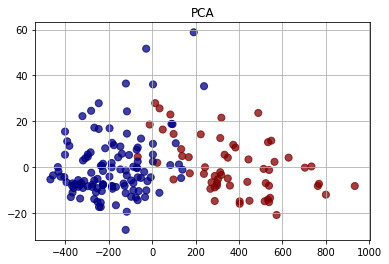

In [57]:
#Aplicando o PCA para transformar os dados de treze para duas dimensões e visualizar
xPCA = PCA(n_components = 2).fit_transform(x)

plt.scatter(x=xPCA[:, 0], y=xPCA[:, 1], c=y, cmap='jet_r', s=50, alpha=0.75)
plt.title('PCA')
plt.grid(True)
plt.show()

In [58]:
# Aplicando o k-Fold cross validation para testar o perceptron
objPerceptron = Perceptron()

#Instânciando um objeto KFold com 10 pacotes
objKFold = KFold(n_splits = 10, shuffle=True, random_state=None)

i = 0

#Rodando o perceptron no KFold
for trainIndex, testIndex in objKFold.split(x):
    i += 1
    
    xTrain, yTrain, xTest, yTest = x[trainIndex], y[trainIndex], x[testIndex], y[testIndex]
    
    objPerceptron.treinarPerceptron(xTrain, yTrain)
    yPred = objPerceptron.predizerDados(xTest)
    
    print("Iteração: ", i)
    print("Acurácia: ", accuracy_score(yTest, yPred))
    print("\n")

Iteração:  1
Acurácia:  0.8333333333333334


Iteração:  2
Acurácia:  0.8333333333333334


Iteração:  3
Acurácia:  0.9444444444444444


Iteração:  4
Acurácia:  0.8333333333333334


Iteração:  5
Acurácia:  0.9444444444444444


Iteração:  6
Acurácia:  0.7777777777777778


Iteração:  7
Acurácia:  0.8333333333333334


Iteração:  8
Acurácia:  0.9444444444444444


Iteração:  9
Acurácia:  0.8235294117647058


Iteração:  10
Acurácia:  0.9411764705882353


